In [1]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

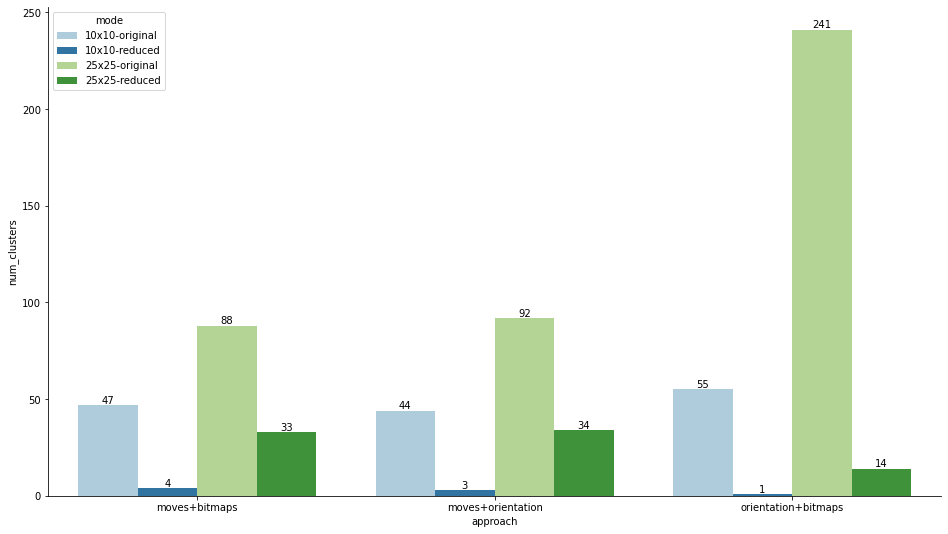

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.general import save_figure

featuremaps_df = pd.read_pickle('../logs/feature_combinations_clusters').reset_index()
featuremaps_df['num_clusters'] = featuremaps_df['clusters'].apply(len)
featuremaps_df['mode'] = featuremaps_df.apply(
    lambda row: f'{row["map_size"]}-{row["mode"]}',
    axis=1
)

fig = plt.figure(figsize=(16, 9))
ax = sns.barplot(x='approach', y='num_clusters', hue='mode', data = featuremaps_df, palette=sns.color_palette('Paired'))
for container in ax.containers:
    ax.bar_label(container)
sns.despine()
save_figure(fig, '/Users/lodovicoazzini/Desktop/cluster_sizes')

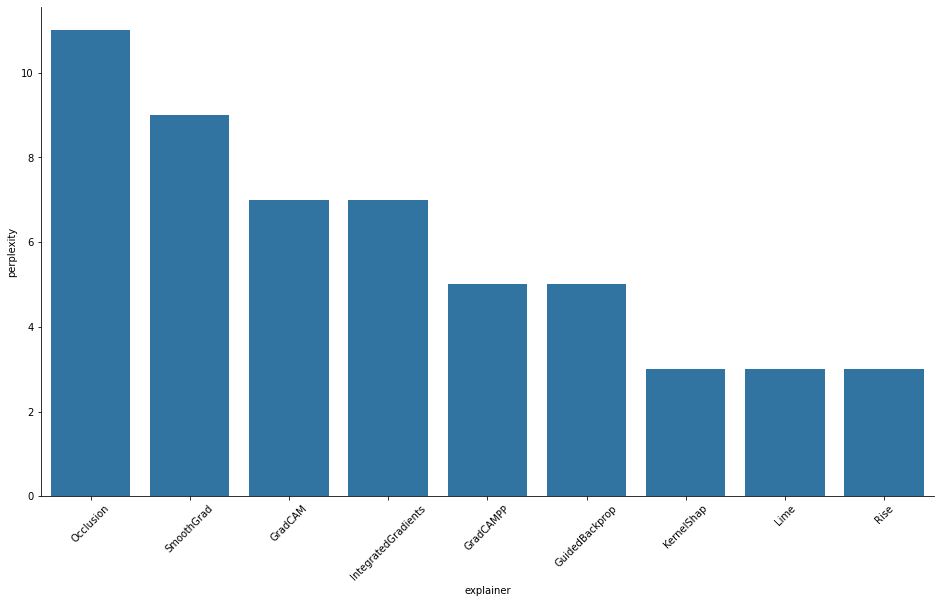

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heatmaps_data = pd.read_pickle('../logs/heatmaps_data')
plot_data = heatmaps_data[['explainer', 'perplexity']].groupby('explainer').min().reset_index(drop=False)
plot_data = plot_data.sort_values('perplexity', ascending=False)

fig = plt.figure(figsize=(16,9))
ax = sns.barplot(x='explainer', y='perplexity', data=plot_data, color=sns.color_palette(n_colors=1)[0])
sns.despine()
plt.xticks(rotation=45);

save_figure(fig, '/Users/lodovicoazzini/Desktop/perplexity_by_explainer')

In [20]:
heatmaps_data

,clustering_mode,explainer,contributions,clustering_technique,dim_red_techs,dim_red_techs_params,silhouette,clusters,projections,num_clusters,time_contributions,time_clustering,timestamp,perplexity
0,LocalLatentMode,GradCAM,"[[[9.97461e-07, 9.97461e-07, 9.97461e-07, 9.97...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.398,"[[0, 385, 258, 389, 146, 31, 161, 420, 179, 30...","[[-34.818672, -59.268105], [-32.349865, 10.472...",23,0.88540,2.74482,2022-04-26 12:32:51.682342,7.0
1,LocalLatentMode,GradCAM,"[[[9.97461e-07, 9.97461e-07, 9.97461e-07, 9.97...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.397,"[[0, 385, 258, 389, 146, 282, 161, 420, 179, 3...","[[33.75892, 60.20998], [-20.100952, 26.228228]...",24,0.88540,3.00155,2022-04-26 12:32:54.685916,7.0
2,LocalLatentMode,GradCAM,"[[[9.97461e-07, 9.97461e-07, 9.97461e-07, 9.97...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.403,"[[0, 385, 258, 389, 146, 409, 282, 161, 419, 4...","[[66.3159, 12.297774], [20.09716, -24.738503],...",25,0.88540,3.46577,2022-04-26 12:32:58.155456,7.0
3,LocalLatentMode,GradCAM,"[[[9.97461e-07, 9.97461e-07, 9.97461e-07, 9.97...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.396,"[[0, 385, 258, 389, 146, 156, 286, 161, 420, 1...","[[-39.68808, -56.723644], [17.72001, -26.89854...",25,0.88540,4.03903,2022-04-26 12:33:02.196634,7.0
4,LocalLatentMode,GradCAM,"[[[9.97461e-07, 9.97461e-07, 9.97461e-07, 9.97...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.395,"[[0, 385, 258, 389, 146, 409, 282, 161, 419, 4...","[[-61.26749, 21.099888], [9.419656, 32.742905]...",24,0.88540,2.76049,2022-04-26 12:33:04.959279,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,LocalLatentMode,Occlusion,"[[[0.06040135, 0.06040135, 0.06040135, 0.06040...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",NaN,"[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...","[[-2.5052733, 28.282663], [9.931297, 57.671032...",1,6.50053,3.33402,2022-04-26 14:01:47.730809,11.0
456,LocalLatentMode,Occlusion,"[[[0.06040135, 0.06040135, 0.06040135, 0.06040...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.472,"[[0, 131, 259, 260, 394, 403, 22, 154, 289, 42...","[[17.646423, -11.400501], [53.68156, 6.578474]...",22,6.50053,2.53684,2022-04-26 14:01:50.269695,11.0
457,LocalLatentMode,Occlusion,"[[[0.06040135, 0.06040135, 0.06040135, 0.06040...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.465,"[[0, 640, 131, 259, 394, 403, 531, 22, 154, 79...","[[-46.572884, -11.095407], [40.648045, -27.661...",22,6.50053,2.99021,2022-04-26 14:01:53.262039,11.0
458,LocalLatentMode,Occlusion,"[[[0.06040135, 0.06040135, 0.06040135, 0.06040...",AffinityPropagation,[TSNE],"[{'angle': 0.5, 'early_exaggeration': 12.0, 'i...",0.465,"[[0, 132, 260, 394, 523, 403, 22, 407, 676, 29...","[[15.091485, 14.625213], [32.09713, -34.29341]...",22,6.50053,2.93115,2022-04-26 14:01:56.195256,11.0
